In [1]:
%matplotlib inline
import yt 
import numpy as np
import matplotlib.pyplot as plt

from yt.visualization.base_plot_types import get_multi_plot
import matplotlib.colorbar as cb
from matplotlib.colors import LogNorm


from galaxy_analysis.yt_fields import field_generators as fg
from galaxy_analysis.utilities import convert_abundances as ca
from galaxy_analysis.plot.plot_styles import *

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

rc('text',usetex=False)
rc('font',size=fsize)


In [3]:
workdir = "/home/aemerick/work/enzo_runs/cosmo_testing/nested/"

In [16]:
dsname = "RD0002/RedshiftOutput0002"

ds = yt.load(workdir + dsname)
fg.generate_derived_fields(ds)
ds = yt.load(workdir + dsname)
fg.generate_particle_filters(ds)
data = ds.all_data()

Parsing Hierarchy : 100%|██████████| 293/293 [00:00<00:00, 13312.80it/s]
/home/aemerick/code/onezone/onezone/data_tables.py:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


defining for the following metals  ['C', 'N', 'O', 'Mg', 'Ca', 'Fe', 'Sr', 'Ba']


/home/aemerick/.local/lib/python3.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Mg', 'Ca', 'Fe', 'Sr', 'Ba']
8 mass fields defined
8 mass fraction fields defined
8 number density fields defined
54 abundance ratio fields defined
54 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 293/293 [00:00<00:00, 11339.09it/s]


In [23]:
#
# Gather some information
# 11: PopII individual star
# 12: WD
# 13: Remnant
# 14: PopIII
# 15: Unresolved (PopII?)

ds.print_stats()

pm = data['particle_mass'].to('Msun')
bm = data['birth_mass']
dx = data['dx'].to('pccm')
pt = data['particle_type']
Z  = data['metallicity_fraction']

star_select   = (pt>=11)
popII_select  = (pt>=11) * (Z >= ds.parameters['PopIIIMetalCriticalFraction'])
popIII_select = (pt>=11) * (Z <  ds.parameters['PopIIIMetalCriticalFraction'])


possible_agb_select    = (pt>=11) * (bm > 3.0) * (bm < 8.0)
finished_agb_select    = (pt>=12) * (pt<=13)   * (bm > 3.0) * (bm < 8.0)


print("Current Redshift = %6.2f"%(ds.current_redshift))
print("Current Time     = %6.3f Myr"%(ds.current_time.to('Myr')))
print("Min / max resolution:   %6.3f / %6.3f pccm"%(np.min(dx),np.max(dx)))

print("Number of Stars: %6.3E"%(np.size(bm[star_select])))
print("Number of PopII Stars ever formed  : %6.3E"%(np.size(bm[popII_select])))
print("Number of PopIII Stars ever formed : %6.3E"%(np.size(bm[popIII_select])))

print("Total Stellar Mass (ever): %6.3E"%(np.sum(bm[star_select])))
print("Total PopII Stellar Mass (ever): %6.3E"%(np.sum(bm[popII_select])))
print("Total PopIII Stellar Mass (ever): %6.3E"%(np.sum(bm[popIII_select])))



print("Total number of eventual AGB stars (ever): %6.3E"%(np.size(bm[possible_agb_select])))
print("Total number of AGB stars (ever): %6.3E"%(np.size(bm[finished_agb_select])))


print("-----------Star Types-----------")
print("type number BM PM")
for i in [11,12,13,14,15]:
    if len(bm[pt==i]) > 0:
        print("%04i %5i %5.3E %5.3E %5.3E %5.3E %5.3E %5.3E"%(i, np.size(bm[pt==i]), np.sum(bm[pt==i]), np.min(bm[pt==i]), np.max(bm[pt==i]),
                                                             np.sum(pm[pt==i]), np.min(pm[pt==i]), np.max(pm[pt==i])))
    else:
        print("%04i %5i None None None None None None"%(i,0))

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	    96	        262144	            64
  1	    24	        195112	            58
  2	     8	        512000	            80
  3	    73	       1178448	           106
  4	    63	        137472	            52
  5	    22	         17208	            26
  6	     5	          4632	            17
  7	     2	           600	             9
----------------------------------------------
   	   293	       2307616


t = 8.61181732e+00 = 5.83738713e+15 s = 1.84975636e+08 years

Smallest Cell:
	Width: 5.813e-06 Mpc
	Width: 5.813e+00 pc
	Width: 1.199e+06 AU
	Width: 1.794e+19 cm
Current Redshift =  20.00
Current Time     = 184.976 Myr
Min / max resolution:   122.070 / 15625.000 pccm
Number of Stars: 3.000E+00
Number of PopII Stars ever formed  : 0.000E+00
Number of PopIII Stars ever formed : 3.000E+00
Total Stellar Mass (ever): 4.708E+02
Total PopII Stellar Mass (ever): 0.000E+00
Total PopIII Stellar Mass (ever): 4.7

In [7]:
dxmin = np.min(data['dx'].to('pc')) / 4.0 / 2.0 /2.0 /2.0 /2.0

print(dxmin)

0.048824630274284846 pc


Total Mass Above SF Treshold = 0.000E+00 Msun



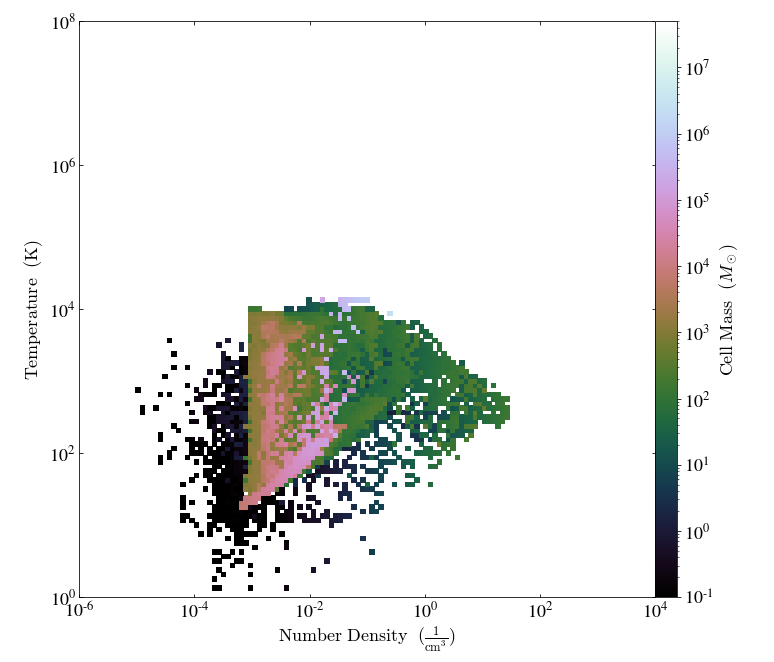

['/home/aemerick/work/enzo_runs/cosmo_testing/nested/RedshiftOutput0002_2d-Profile_number_density_Temperature_cell_mass.png']

In [19]:
#
#
# Projection Plot(s)
#
#
pp = yt.PhasePlot(ds, 'number_density','Temperature', 'cell_mass')

pp.set_unit('number_density','1/cm**3')
pp.set_unit('Temperature','K')
pp.set_xlim(1.0E-6,1.0E4)
pp.set_ylim(1.0,1.0E8)

pp.set_unit("cell_mass","Msun")
pp.set_zlim('cell_mass',0.1,5.0E7)
pp.set_cmap('cell_mass','cubehelix')

n  = data['number_density']
cm = data['cell_mass'].to('Msun')

print("Total Mass Above SF Treshold = %5.3E Msun"%(np.sum(cm[n>ds.parameters['StarMakerOverDensityThreshold']])))

pp.show()
pp.save(workdir)

In [150]:
center = ds.domain_center.to('kpc')
l      = 10.0 * yt.units.kpc

In [153]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'birth_mass'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_


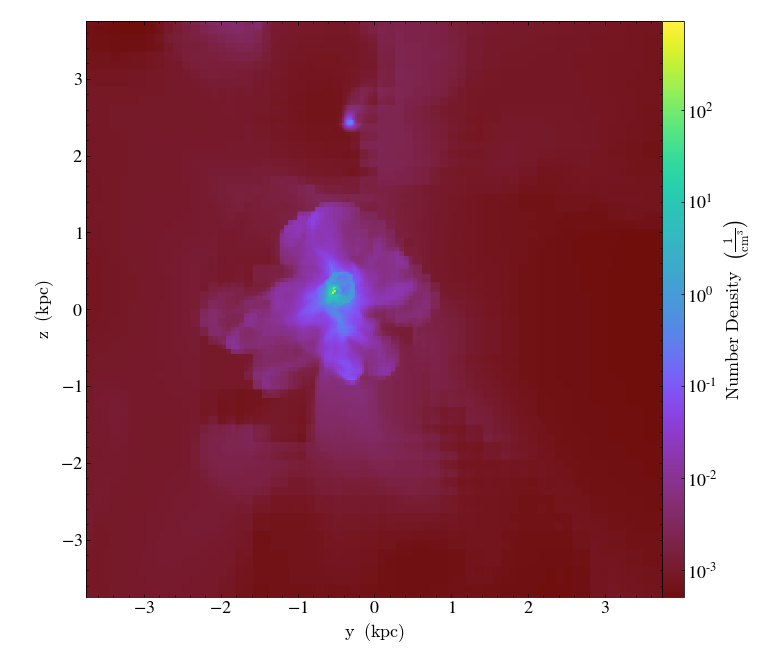
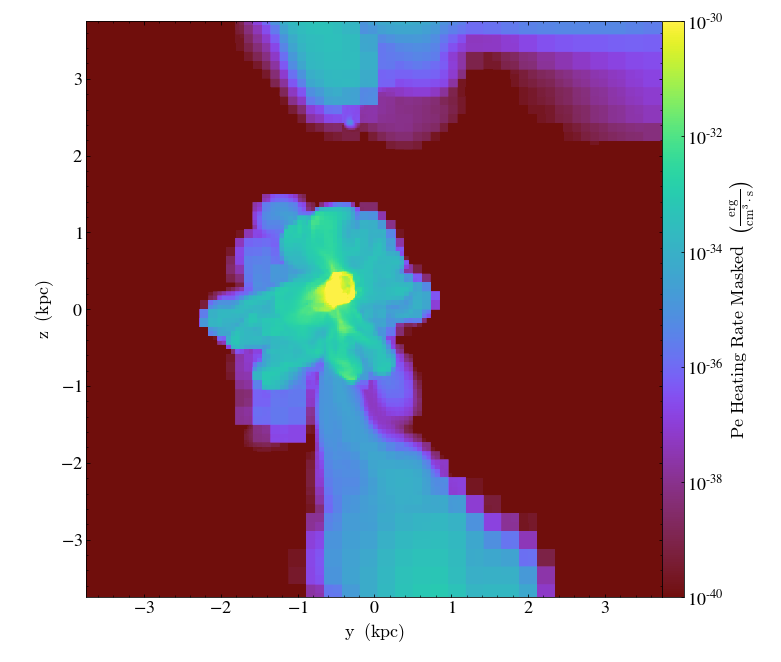
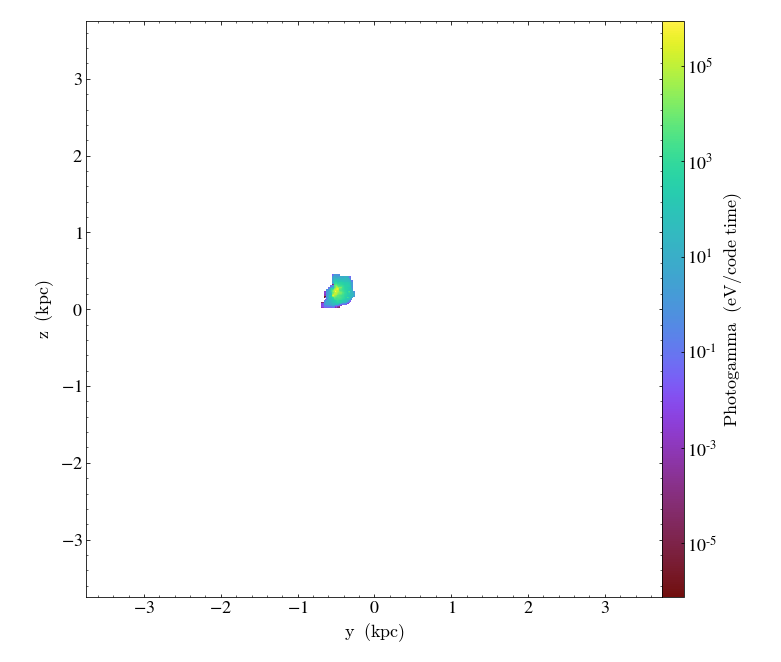


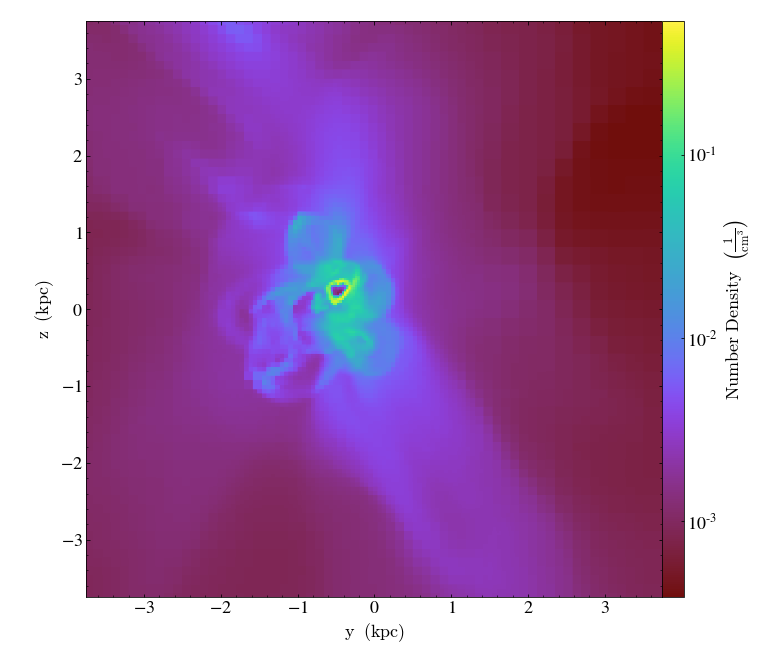
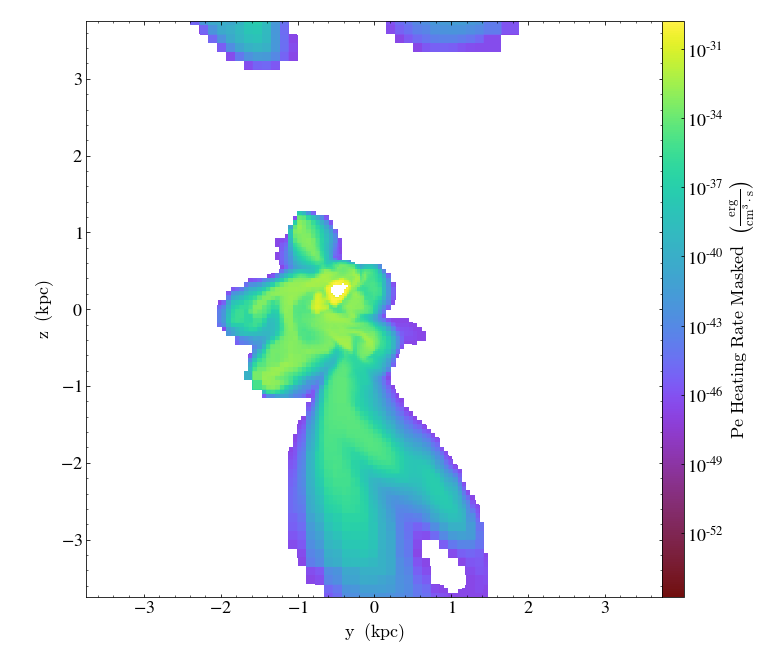
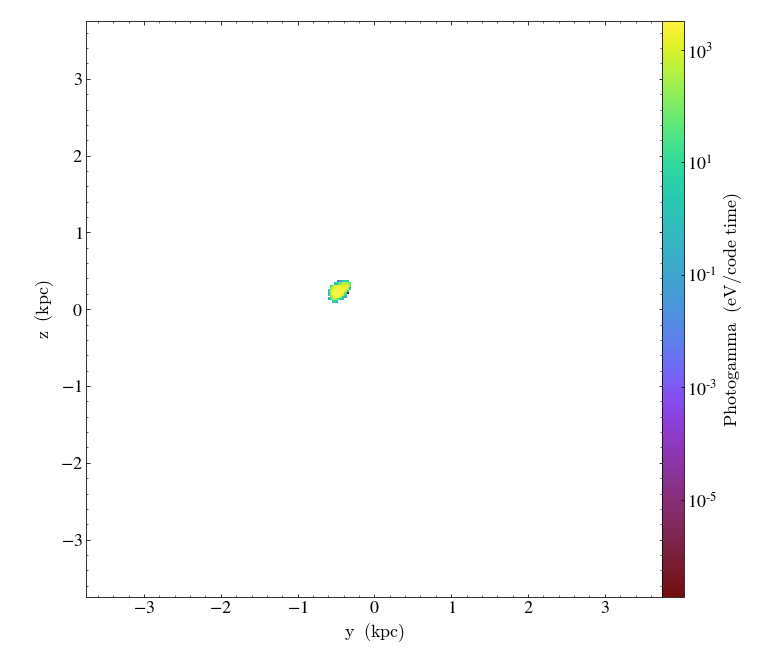

In [169]:
fields = ['number_density','PhotoGamma','Pe_heating_rate_masked']
center = ds.domain_center.to('kpc')
center = center + np.array([0.0,2.5,-1.5])*yt.units.kpc

region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(ds, 'x', fields, weight_field = 'Metal_Density', center = center,
                       data_source=region, width = 0.75*l)

pp.set_zlim('Pe_heating_rate_masked',1.0E-40,1.0E-30)
pp.show()

sp = yt.SlicePlot(ds,'x',fields,center=center,data_source=region,width=0.75*l)
sp.show()

In [168]:
fields = ['number_density','Temperature','Fe_over_H',"alpha_over_Fe",'HI_kph','PhotoGamma']
center = ds.domain_center.to('kpc')
l      = 10.0 * yt.units.kpc
region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(ds, 'x', fields, weight_field = 'Metal_Density', center = center,
                       data_source=region, width = 2.0*l)


if 'number_density' in pp.fields:
    field = 'number_density'
    pp.set_zlim(field, 1.0E-4, 1.0E1)
    pp.set_cmap(field,'viridis')
    pp.set_log(field,True)
    
if 'Temperature' in pp.fields:
    field = 'Temperature'
    pp.set_zlim(field, 100.0, 1.0E6)
    pp.set_cmap(field,'RdYlBu_r')  
    pp.set_log(field,True)
        
if 'Fe_over_H' in pp.fields:
    field = 'Fe_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'cubehelix') 
    
if 'alpha_over_Fe' in pp.fields:
    field = 'alpha_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -2, 2)
    pp.set_cmap(field,'PRGn') 

if 'Ba_over_Fe' in pp.fields:
    field = 'Ba_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -3, 3)
    pp.set_cmap(field,'cubehelix')

if 'HI_kph' in pp.fields:
    field = 'HI_kph'
    pp.set_unit(field,'1/s')
    pp.set_zlim(field, 1.0E-17, 1.0E-11)
    pp.set_cmap(field,'plasma')
    
    
pp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
pp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
pp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
pp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)

pp.show()
pp.save()

/home/aemerick/.local/lib/python3.7/site-packages/yt/data_objects/construction_data_containers.py:379: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(nvals, nwvals[:,None], nvals)


KeyboardInterrupt: 

In [142]:
fig, all_axes, colorbars = get_multi_plot(4, 1, colorbar='horizontal', bw = 4)
fields = ['number_density','Temperature','HI_kph',
          'Fe_over_H'] # ,'Ba_over_H']

width = 2.0 * l

axes = all_axes[0]

center = ds.domain_center.to('kpc')
l      = 10.0 * yt.units.kpc
region = ds.region(center, center - l, center + l)

#region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(ds, 'y', fields, weight_field = 'Metal_Density', center = center,
                       data_source=region, 
                       width = 2.0*l)


if 'number_density' in pp.fields:
    field = 'number_density'
    pp.set_zlim(field, 1.0E-4, 1.0E1)
    pp.set_cmap(field,'viridis')
    pp.set_log(field,True)
    
if 'Temperature' in pp.fields:
    field = 'Temperature'
    pp.set_zlim(field, 100.0, 1.0E5)
    pp.set_cmap(field,'RdYlBu_r')  
    pp.set_log(field,True)
        
if 'Fe_over_H' in pp.fields:
    field = 'Fe_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'cubehelix') 
    
if 'alpha_over_Fe' in pp.fields:
    field = 'alpha_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -2, 2)
    pp.set_cmap(field,'PRGn') 

if 'Ba_over_Fe' in pp.fields:
    field = 'Ba_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -3, 3)
    pp.set_cmap(field,'cubehelix')

if 'HI_kph' in pp.fields:
    field = 'HI_kph'
    pp.set_unit(field,'1/s')
    pp.set_zlim(field, 1.0E-17, 1.0E-11)
    pp.set_cmap(field,'plasma')
    
    
pp.set_buff_size(512)

pp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
pp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
pp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
pp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)
#pp = yt.ProjectionPlot(ds, 'y', fields, weight_field = 'Metal_Density', center = center,
#                       data_source=region)#, width = 2.0*l)









proj_frb = pp.data_source.to_frb((20,'kpc'), 512)

axes[1].yaxis.set_visible(False)
axes[2].yaxis.set_visible(False)
axes[3].yaxis.set_visible(False)


frb1 = np.array(proj_frb['number_density'])
frb2 = np.array(proj_frb['Temperature'])
frb3 = np.array(proj_frb['HI_kph'].to('1/s'))
frb4 = np.array(proj_frb['Fe_over_H'])
    
plots = [ axes[0].imshow( frb1, origin='lower',norm=LogNorm(), extent=[0,20,0,20]),
          axes[1].imshow( frb2 ,origin='lower',norm=LogNorm(), extent=[0,20,0,20]),
          axes[2].imshow( frb3 ,origin='lower',norm=LogNorm(), extent=[0,20,0,20]),
          axes[3].imshow( frb4 ,origin='lower', extent=[0,20,0,20]) ]

plots[0].set_clim((1.0E-4,1.0E1))
plots[0].set_cmap('viridis')
plots[1].set_clim((1.0E2,1.0E5))
plots[1].set_cmap('RdYlBu_r')
plots[2].set_clim((1.0E-17,1.0E-11))
plots[2].set_cmap('plasma')
plots[3].set_clim((-9,0))
plots[3].set_cmap('cubehelix')


for a in axes:
    #a.set_xticks([0,4,8,12,16])
    #a.set_xlabel('x (kpc)')
    a.set_xticklabels([])


particle_types = ['main_sequence_stars','main_sequence_popIII_stars','remnant_stars','low_mass_unresolved_stars']
particle_colors = ['C1','black','black','black']
particle_markers = ['*','*','D','o']
particle_sizes   = [100,100,10,10]
particle_alpha   = [1,1,0.5,0.5]

for i in np.arange(np.size(particle_types)):
    
    
    scale = ds.domain_width[0].to('kpc').value / width.value
    center2 = center.to('kpc') / ds.domain_width.to('kpc')
    center2 = [0.5]*3
    particle_x = scale*(region[(particle_types[i],'particle_position_x')] - ds.domain_center[0]).value + center2[0] #.to('kpc').value
    particle_y = scale*(region[(particle_types[i],'particle_position_y')] - ds.domain_center[1]).value + center2[1] #to('kpc').value
    particle_z = scale*(region[(particle_types[i],'particle_position_z')] - ds.domain_center[2]).value + center2[2] #to('kpc').value

    for ax in axes:
        ax.scatter(particle_z, particle_x, s=particle_sizes[i],
                   color = particle_colors[i], marker = particle_markers[i],
                   transform = ax.transAxes, alpha = particle_alpha[i])
          
    
titles = [r'$\mathrm{Density}\ (\mathrm{g\ cm^{-3}})$',
          r'$\mathrm{Temperature}\ (\mathrm{K})$',
          r'$\mathrm{HI~Ionization~Rate}\ (\mathrm{s^{-1}})$',
          r'$\mathrm{[Fe/H]}\ (\mathrm{(dex)})$']


axes[0].plot( [0.07 + 0.05, (0.07 + 0.1) + 0.05], [0.05,0.05], color = "white",
          lw = 3, transform = axes[0].transAxes)
xy = (0.07, 0.075)
axes[0].text(xy[0], xy[1], "%.1f kpc"%(width / 10.0), color = 'white',
        fontsize = 16, transform = axes[0].transAxes)

for p, cax, t in zip(plots, colorbars, titles):
    cbar = fig.colorbar(p,cax=cax,orientation='horizontal')
    cbar.set_label(t)
    
fig.savefig("test.png")


In [136]:
width

20.0 kpc

/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



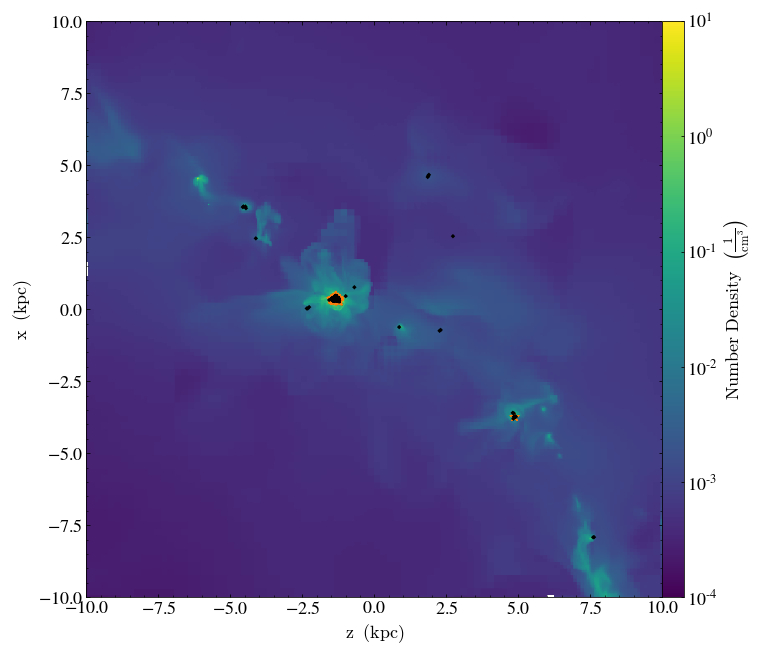
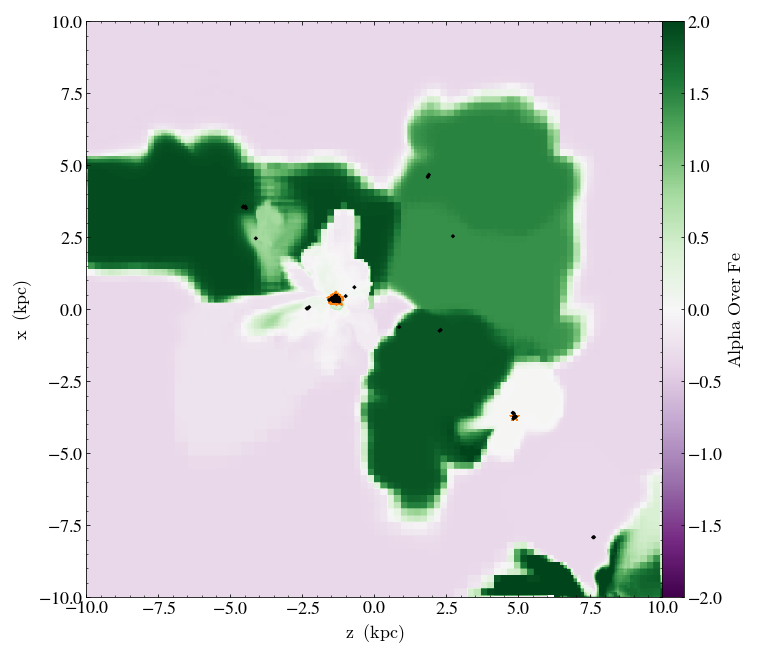
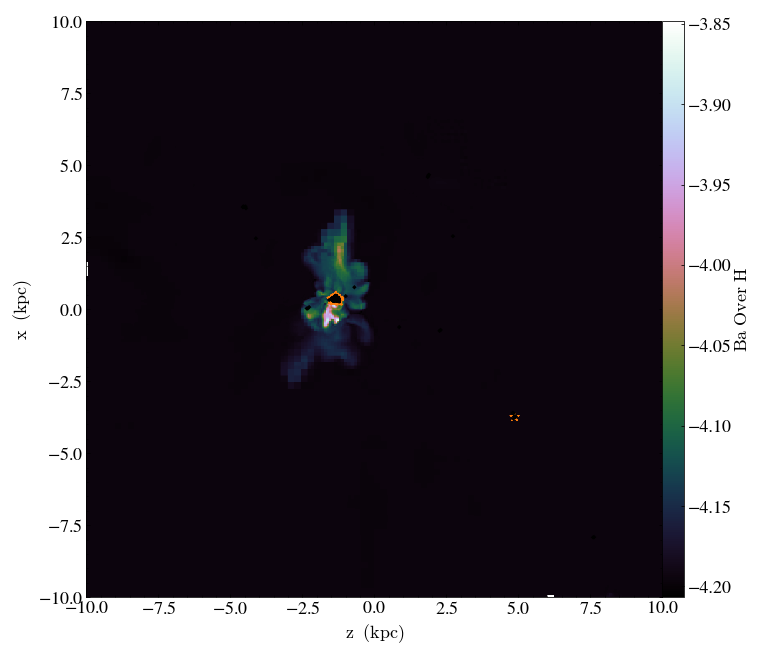
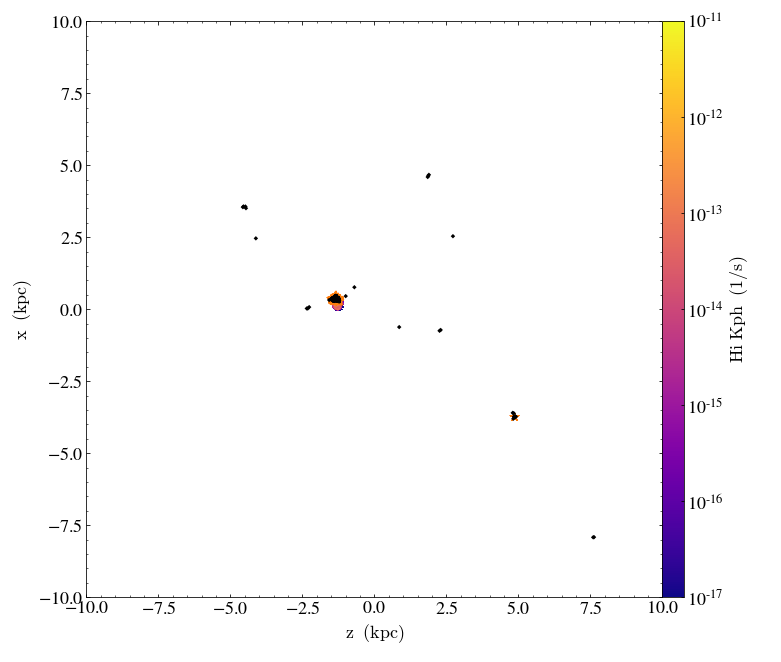
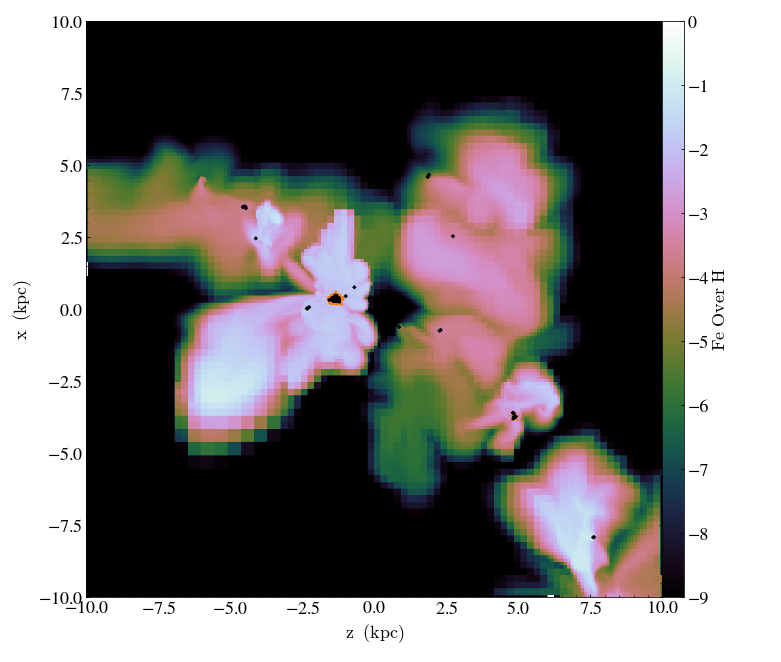
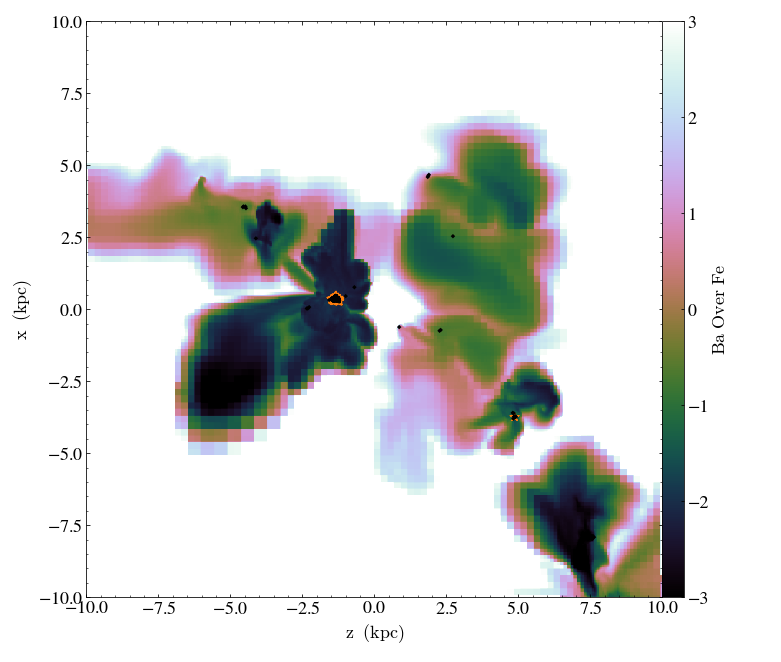
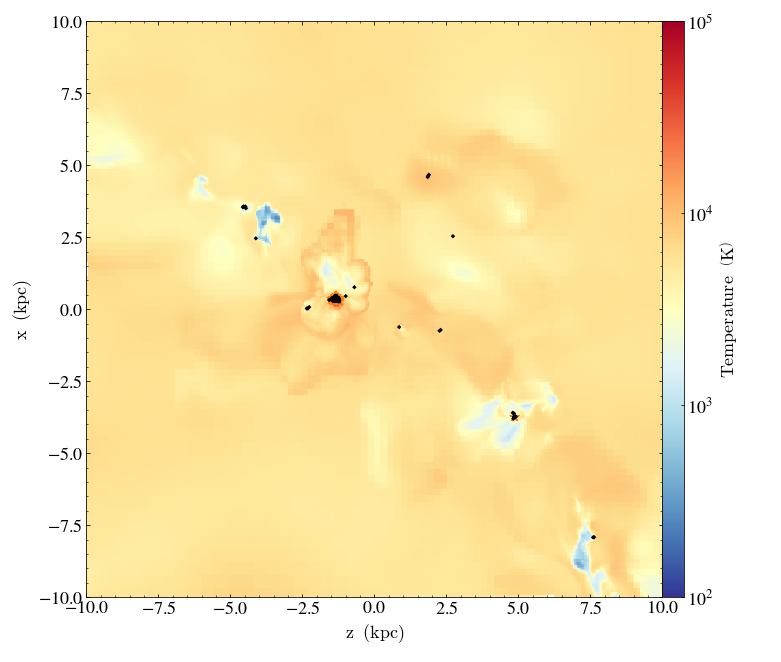

/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


['DD0116_Projection_y_number_density_Metal_Density.png',
 'DD0116_Projection_y_alpha_over_Fe_Metal_Density.png',
 'DD0116_Projection_y_Ba_over_H_Metal_Density.png',
 'DD0116_Projection_y_HI_kph_Metal_Density.png',
 'DD0116_Projection_y_Fe_over_H_Metal_Density.png',
 'DD0116_Projection_y_Ba_over_Fe_Metal_Density.png',
 'DD0116_Projection_y_Temperature_Metal_Density.png']

In [171]:
fields = ['number_density','Temperature','Fe_over_H',"alpha_over_Fe",'Ba_over_H','Ba_over_Fe','HI_kph']
center = ds.domain_center.to('kpc')
l      = 10.0 * yt.units.kpc
region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(ds, 'y', fields, weight_field = 'Metal_Density', center = center,
                       data_source=region, width = 2.0*l)


if 'number_density' in pp.fields:
    field = 'number_density'
    pp.set_zlim(field, 1.0E-4, 1.0E1)
    pp.set_cmap(field,'viridis')
    pp.set_log(field,True)
    
if 'Temperature' in pp.fields:
    field = 'Temperature'
    pp.set_zlim(field, 100.0, 1.0E5)
    pp.set_cmap(field,'RdYlBu_r')  
    pp.set_log(field,True)
        
if 'Fe_over_H' in pp.fields:
    field = 'Fe_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'cubehelix')
    

            
if 'Ba_over_H' in pp.fields:
    field = 'Ba_over_H'
    pp.set_log(field,False)
    #pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'cubehelix') 
    
    
if 'alpha_over_Fe' in pp.fields:
    field = 'alpha_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -2, 2)
    pp.set_cmap(field,'PRGn') 

if 'Ba_over_Fe' in pp.fields:
    field = 'Ba_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -3, 3)
    pp.set_cmap(field,'cubehelix')

if 'HI_kph' in pp.fields:
    field = 'HI_kph'
    pp.set_unit(field,'1/s')
    pp.set_zlim(field, 1.0E-17, 1.0E-11)
    pp.set_cmap(field,'plasma')
    
    
pp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
pp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
pp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
pp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)




pp.show()

pp.save()

/home/aemerick/.local/lib/python3.7/site-packages/yt/data_objects/construction_data_containers.py:379: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(nvals, nwvals[:,None], nvals)
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/aemerick/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



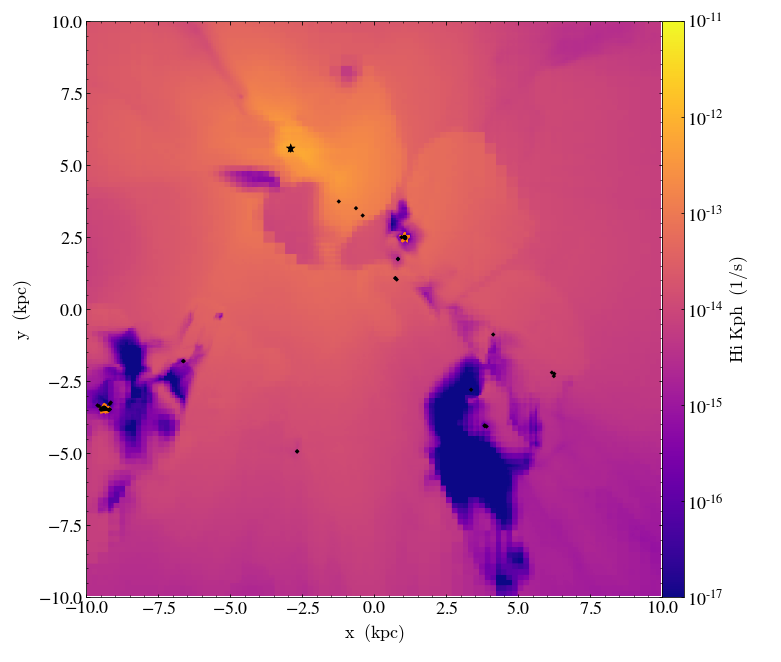
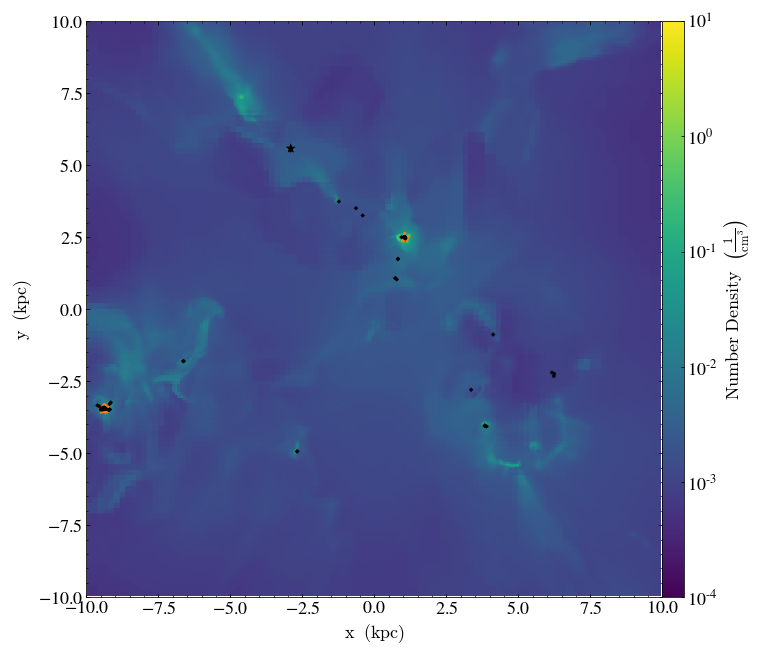
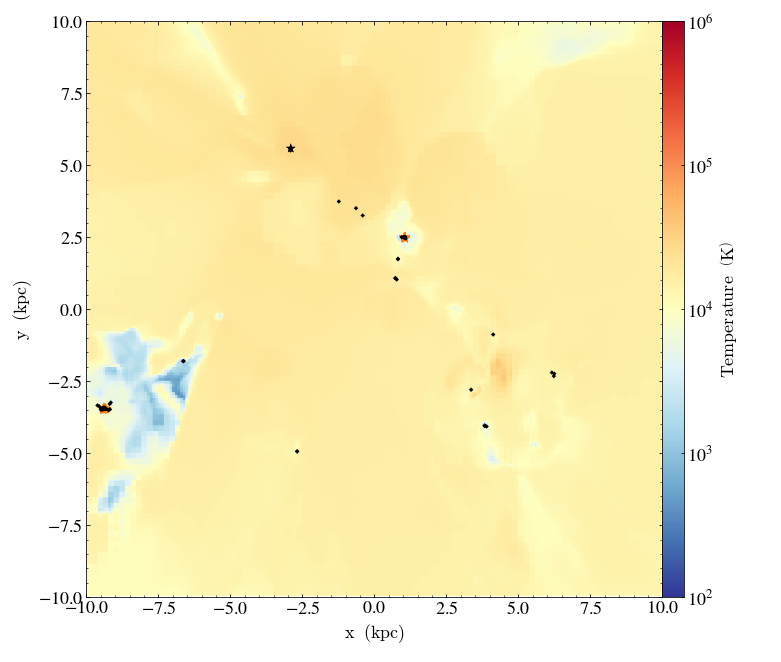
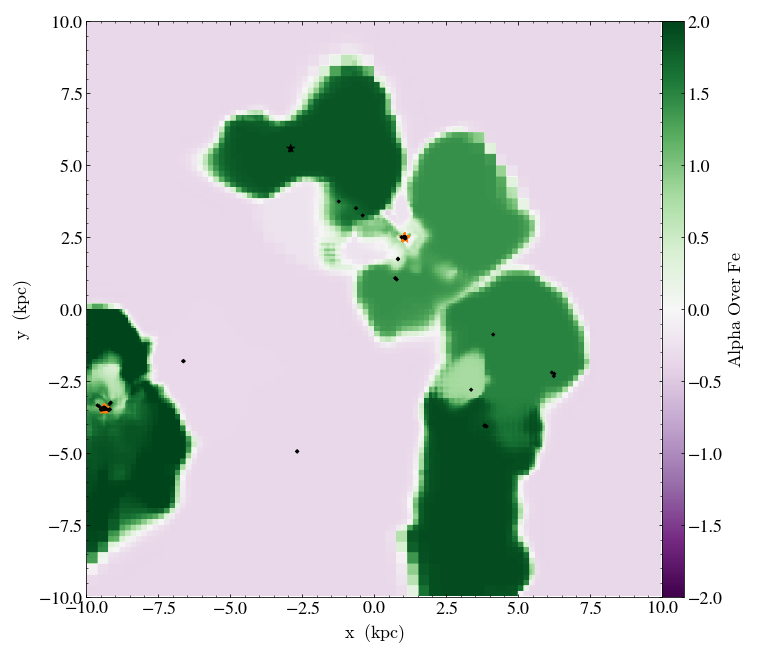
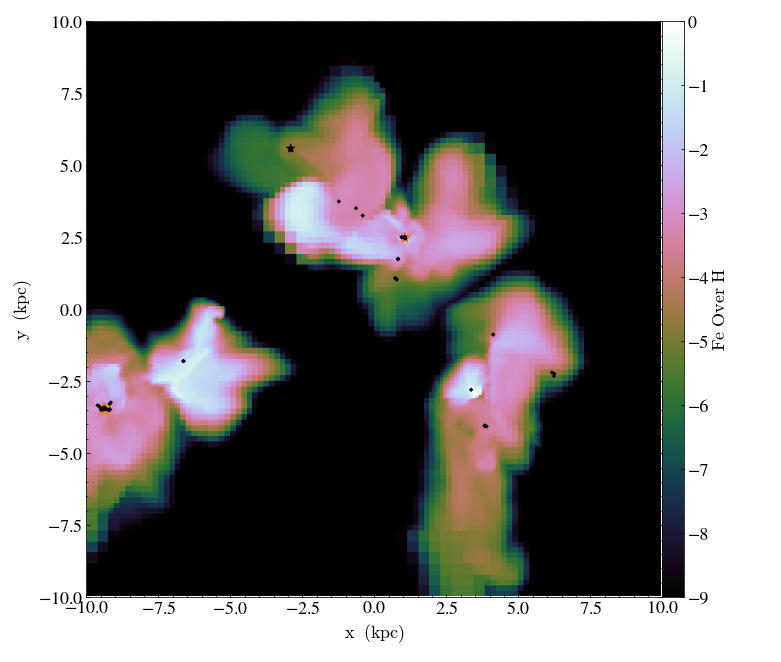

In [82]:
fields = ['number_density','Temperature','Fe_over_H',"alpha_over_Fe",'HI_kph']

region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(ds, 'z', fields, weight_field = 'Metal_Density', center = center,
                       data_source=region, width = 2.0*l)


if 'number_density' in pp.fields:
    field = 'number_density'
    pp.set_zlim(field, 1.0E-4, 1.0E1)
    pp.set_cmap(field,'viridis')
    pp.set_log(field,True)
    
if 'Temperature' in pp.fields:
    field = 'Temperature'
    pp.set_zlim(field, 100.0, 1.0E5)
    pp.set_cmap(field,'RdYlBu_r')  
    pp.set_log(field,True)
        
if 'Fe_over_H' in pp.fields:
    field = 'Fe_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'cubehelix') 
    
if 'alpha_over_Fe' in pp.fields:
    field = 'alpha_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -2, 2)
    pp.set_cmap(field,'PRGn') 

if 'Ba_over_Fe' in pp.fields:
    field = 'Ba_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -3, 3)
    pp.set_cmap(field,'cubehelix')

if 'HI_kph' in pp.fields:
    field = 'HI_kph'
    pp.set_unit(field,'1/s')
    pp.set_zlim(field, 1.0E-17, 1.0E-11)
    pp.set_cmap(field,'plasma')
    
    
pp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
pp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
pp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
pp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)

pp.show()
pp.save()

In [87]:
print(np.unique(pt))

select_WD_sources = (bm > 3.0) * (bm < 8.0) * (pt < 15)
select_WD = (pt == 12)
print(np.size(bm[select_WD_sources]))
print(np.size(bm[select_WD]))
death = data[('io','dynamical_time')].to('Myr') + data['creation_time'].to('Myr')

print(death[select_WD])

[ 1. 11. 12. 13. 14. 15.] dimensionless
137
33
[1.40846669e+07 1.40846669e+07 8.59511698e+03 1.40846671e+07
 1.40846676e+07 1.40846677e+07 1.40846694e+07 1.37429163e+03
 1.40846723e+07 1.40846728e+07 1.40846106e+07 1.40846108e+07
 1.40846109e+07 1.40846111e+07 1.40846112e+07 1.40846113e+07
 1.40846113e+07 1.40846120e+07 1.40846120e+07 1.40846122e+07
 1.40846125e+07 1.40846104e+07 1.40846108e+07 1.40846109e+07
 1.40846110e+07 1.40846111e+07 1.40846113e+07 1.40846115e+07
 1.40846115e+07 1.40846117e+07 1.40846120e+07 1.40846122e+07
 1.40846122e+07] Myr


In [86]:
ds.field_list

[('all', 'birth_mass'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('all', 'sn_mass_ejected'),
 ('all', 'wind_mass_ejected'),
 ('enzo', 'AGB_Metal_Density'),
 ('enzo', 'As_Density'),
 ('enzo', 'Ba_Density'),
 ('enzo', 'C_Density'),
 ('enzo', 'Ca_Density'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'FUV_FluxDensity'),
 ('enzo', 'Fe_Density'),
 ('enzo', 'GasEnergy'),
 ('enzo', 'H2II_Density'),
 ('enzo', 'H2II_kdiss'),
 ('enzo', 'H2I_Density'),
 ('enzo', 'H2I_kdiss'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HI_kph'),
 ('enzo', 'HM_Density'),
 ('enzo', 'HM_kph'),
 ('enzo', 'HeIII_Density'),
 (

In [8]:
import matplotlib.colors as colors

def generate_2d_color_hist(data, xfield, yfield, zfield = 'cell_mass',
                           method = 'sum', # method for color field. Sum values, min / max, etc.
                           db = 0.1, selection = None,
                           xlim=None, ylim=None, xlog=False, ylog=False,
                           xunit = None, yunit = None, zunit = None):
    
    #xfield = xe1 + '_over_' + xe2
    #yfield = ye1 + '_over_' + ye2
        
    xvals = data[xfield]
    yvals = data[yfield]
    zvals = data[zfield]
    
    if not (selection is None):
        xvals = xvals[selection]
        yvals = yvals[selection]
        zvals = zvals[selection]
    
    
    
    if xlog:
        xvals = np.log10(xvals)
    if ylog:
        yvals = np.log10(yvals)
    
    if not (xunit is None):
        xvals = xvals.to(xunit)
    if not (yunit is None):
        yvals = yvals.to(yunit)
    if not (zunit is None):
        zvals = zvals.to(zunit)
    
    if xlim is None:
        xlim = [np.min(xvals), np.max(xvals)]
    if ylim is None:
        ylim = [np.min(yvals), np.max(yvals)]
        
    
    if len(db) > 1:
        dbx = db[0]
        dby = db[1]
    else:
        dbx = db
        dby = db
    
    xbins = np.arange(xlim[0], xlim[1], dbx)
    ybins = np.arange(ylim[0], ylim[1], dby)
    
    
    bin_values,_,__ = np.histogram2d(xvals,yvals,bins=(xbins, ybins), weights = zvals)
    X, Y = np.meshgrid(xbins, ybins)
    
    
    return X, Y, bin_values





In [6]:
dsname2 = "DD0116/DD0116"

ds2 = yt.load(dsname2)
fg.generate_derived_fields(ds2)
ds2 = yt.load(dsname2)
fg.generate_particle_filters(ds2)
data2 = ds2.all_data()

Parsing Hierarchy : 100%|██████████| 1762/1762 [00:00<00:00, 8056.02it/s]
/home/aemerick/code/onezone/onezone/data_tables.py:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:
/home/aemerick/.local/lib/python3.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 1762/1762 [00:00<00:00, 16774.89it/s]


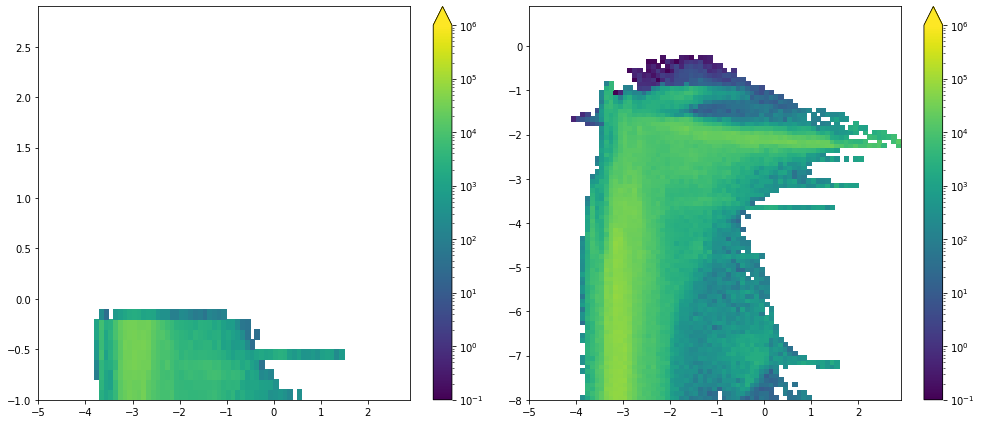

In [9]:
xe1, xe2 = "Fe","H"
ye1, ye2 = "Mg", "Fe"

xlim = [-8,1]
ylim = [-8,1]

ylim = [-1,3]

db = [0.1,0.1]

xlim = [-5,3]

X,Y,vals = generate_2d_color_hist(data2, "number_density", "Ba_over_Fe", "cell_mass", db = db,
                                  selection = (data2['Fe_over_H'] > -4),
                                  xlim=xlim,ylim=ylim, xlog=True, ylog=False, zunit="Msun")


fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)

pcm = ax[0].pcolormesh(X, Y, vals.T,   cmap = 'viridis', 
              norm = colors.LogNorm(vmin=0.1,vmax=1.0E6))
fig.colorbar(pcm, ax=ax[0], extend='max')
              
    
    
xlim = [-5,3]   
ylim = [-8,1]
    
X,Y,vals = generate_2d_color_hist(data2, "number_density", "Fe_over_H","cell_mass", db = db,
                                  xlim=xlim,ylim=ylim, xlog=True, ylog=False, zunit="Msun")
pcm = ax[1].pcolormesh(X, Y, vals.T,   cmap = 'viridis', 
              norm = colors.LogNorm(vmin=0.1,vmax=1.0E6))
fig.colorbar(pcm, ax=ax[1], extend='max')



plt.tight_layout()

In [137]:
[x for x in ds.derived_field_list if 'snii' in x[1]]

[]

In [138]:
[x for x in ds.parameters if 'AGB' in x]

['IndividualStarAGBThreshold',
 'IndividualStarTrackAGBMetalDensity',
 'IndividualStarAGBWindVelocity']

In [139]:
ds.field_list

[('all', 'birth_mass'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('all', 'sn_mass_ejected'),
 ('all', 'wind_mass_ejected'),
 ('enzo', 'AGB_Metal_Density'),
 ('enzo', 'As_Density'),
 ('enzo', 'Ba_Density'),
 ('enzo', 'C_Density'),
 ('enzo', 'Ca_Density'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'FUV_FluxDensity'),
 ('enzo', 'Fe_Density'),
 ('enzo', 'GasEnergy'),
 ('enzo', 'H2II_Density'),
 ('enzo', 'H2II_kdiss'),
 ('enzo', 'H2I_Density'),
 ('enzo', 'H2I_kdiss'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HI_kph'),
 ('enzo', 'HM_Density'),
 ('enzo', 'HM_kph'),
 ('enzo', 'HeIII_Density'),
 (

In [4]:
np.max(data2['AGB_Mass_Fraction'][data['cell+mass']]

9.429025495753003e-05 dimensionless

In [7]:
popII = data2['birth_mass'][ (data2['particle_type']>=11)*(data2['metallicity_fraction']>ds2.parameters["PopIIIMetalCriticalFraction"]) ]

In [8]:
print(np.size(popII))
print(np.sum(popII)/(1.0*np.size(popII)))

14044
35.832901889278745 dimensionless


-----------  1 Nodes ----------
Wall time per simulation  6.880E+03   hours
Wall time per simulation  286.66794   days 
Total SU per node         6880.031
Total SU                  6880.031
--------------------------------
-----------  2 Nodes ----------
Wall time per simulation  5.870E+03   hours
Wall time per simulation  244.59279   days 
Total SU per node         5870.227
Total SU                  11740.454
--------------------------------
-----------  3 Nodes ----------
Wall time per simulation  4.822E+03   hours
Wall time per simulation  200.92017   days 
Total SU per node         4822.084
Total SU                  14466.253
--------------------------------
-----------  4 Nodes ----------
Wall time per simulation  3.909E+03   hours
Wall time per simulation  162.85579   days 
Total SU per node         3908.539
Total SU                  15634.156
--------------------------------
-----------  6 Nodes ----------
Wall time per simulation  3.513E+03   hours
Wall time per simulation  146

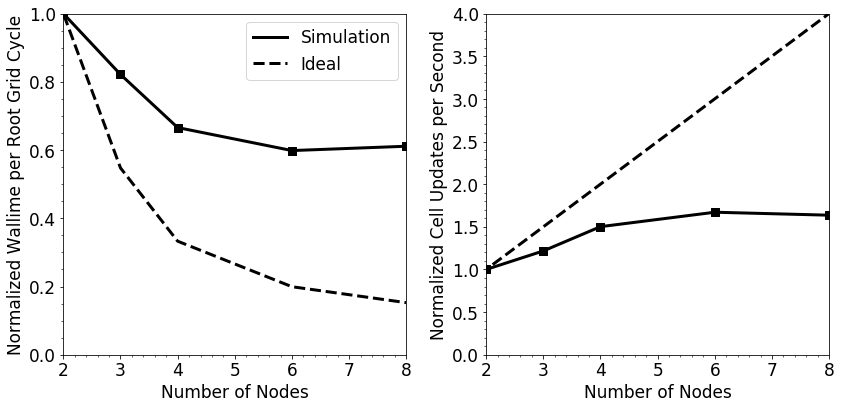

In [230]:
#
#
# Scaling
#

rc('text',usetex=False)
rc('font',size=fsize)

#
cpu_per_node = 48.0
ps = 60

Myr     = 3.1536e+13
tu      = 4.6206558786941e+14
dt_root = (2.059915e-02 * tu) / Myr

tfinal  = 750.0                     # Myr

wall_per_dt_root = {1: 0, 2: 0, 4: 3518.257, 6: 0, 8: 0, 16: 0}         # seconds

wall_per_dt_root = {1: 1.0629E4, 2:   8662.977, 3: 7086.67, 4: 5662.4    , 6:      5083.11, 8: 5090.81   , 12: 4935.414  , 16: 4847.11   , 32:   5499.361}         # seconds
cell_updates     = {1: 3.319E8, 2: 3.170720E8, 3 : 3.157659e+08, 4: 3.112671E8, 6: 3.108882e+08, 8: 3.048946E8, 12: 3.053436E8, 16: 3.048714E8, 32: 2.975159E8}
updates_s_proc   = {1: 650.6, 2: 3.812585E2, 3: 309.42, 4: 286.3057  , 6: 2.123646e+02, 8: 155.966   , 12: 107.409   , 16: 81.89     , 32: 35.2      }

norm_wall_per_dt_root = {}

for node in wall_per_dt_root.keys():
    
    if wall_per_dt_root[node] == 0.0:
        norm_wall_per_dt_root[node] = 0.0
        continue
        
    

    wall_per_sim = (tfinal / dt_root) * wall_per_dt_root[node]
    
    
    norm_wall_per_dt_root[node] = cell_updates[4] / (updates_s_proc[node]*node*cpu_per_node)
    
    wall_per_sim = (tfinal / dt_root) * norm_wall_per_dt_root[node]


    print("----------- %2i Nodes ----------"%(node))
    print("Wall time per simulation  %5.3E   hours"%(wall_per_sim / 3600.0))
    print("Wall time per simulation  %5.5f   days "%(wall_per_sim / 3600.0 / 24.0))

    print("Total SU per node         %5.3f"%(wall_per_sim / 3600.0))
    print("Total SU                  %5.3f"%(wall_per_sim / 3600.0 * node))
    
    print("--------------------------------")
    
    
    
#print("Total SU on 4  nodes  (192 core) %5.3f"%(wall_per_sim / 3600.0))
#print("Total SU on 8  nodes  (384 core) %5.3f"%(wall_per_sim / 3600.0))
#print("Total SU on 16 nodes  ( core) %5.3f"%(wall_per_sim / 3600.0))



fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,6)

x = np.array([*norm_wall_per_dt_root.keys()]) #* cpu_per_node
y = np.array([*norm_wall_per_dt_root.values()])

inorm = 1

ax[0].plot(  x, y / y[inorm], color= 'black',lw=3, ls='-', label = "Simulation")
ax[0].scatter(  x, y / y[inorm], s = ps, color = 'black',marker = 's')

ax[0].plot(  x, y / y[inorm] * 1.0/(x/x[inorm]),color='black',ls='--',lw=3, label= "Ideal")
        

x = np.array([*updates_s_proc.keys()])   #* cpu_per_node
y = np.array([*updates_s_proc.values()]) * x

ax[1].plot(     x, y / y[inorm], color= 'black', ls = '-',lw=3)
ax[1].scatter(  x, y / y[inorm], s = ps, color = 'black',marker = 's')

ax[1].plot(  x, (x/x[inorm]),color='black',ls='--',lw=3)

ax[0].set_ylim(0.0,1.0)
ax[1].set_ylim(0,4)
#ax[0].semilogx()

for a in ax:
    a.set_xlim(x[inorm],8)
    a.set_xlabel("Number of Nodes")
    a.xaxis.set_minor_locator(AutoMinorLocator())
    a.yaxis.set_minor_locator(AutoMinorLocator())
    



ax[0].set_ylabel("Normalized Wallime per Root Grid Cycle")
ax[1].set_ylabel("Normalized Cell Updates per Second")

ax[0].legend(loc='best')

plt.tight_layout()

fig.savefig("strong_scaling.png")

0.3018188214852916

In [45]:
-x + x[1] + y[1]/y[1]

array([  2.,   1.,  -1.,  -3.,  -5.,  -9., -13., -29.])

In [ ]:
x  = wall_per_dt_root.keys

In [18]:
np.asarray(x)

array(dict_keys([1, 2, 4, 6, 8, 12, 16, 32]), dtype=object)

In [ ]:
#
#
# Scaling
#
#
Myr     = 3.1536e+13
tu      = 4.6206558786941e+14
dt_root_nop = (2.059915e-02 * tu) / Myr

tfinal  = 750.0                     # Myr



# NO PHOTONS
wall_per_dt_root_nop = {1: 0, 2: 0, 4: 697.0759, 6:0, 8: 0, 12:0,16: 0,32:0}         # seconds
cell_updates_nop     = {1:0, 2:0, 4:4.056438E8, 6:0, 8:0, 12:0, 16:0, 32:0}
updates_s_proc_nop   = {1:0, 2:0, 4:3.030843E3, 6:0, 8:0, 12:0, 16:0, 32:0}

for node in wall_per_dt_root_nop.keys():
    
    if wall_per_dt_root_nop[node] == 0.0:
        continue

    wall_per_sim_nop = (tfinal / dt_root_nop) * wall_per_dt_root_nop[node]


    print("----------- %2i Nodes ----------"%(node))
    print("Wall time per simulation  %5.3E   hours"%(wall_per_sim_nop / 3600.0))
    print("Wall time per simulation  %5.5f   days "%(wall_per_sim_nop / 3600.0 / 24.0))

    print("Total SU per node         %5.3f"%(wall_per_sim_nop / 3600.0))
    print("Total SU                  %5.3f"%(wall_per_sim_nop / 3600.0 * node))
    
    print("--------------------------------")
    
    
    
#print("Total SU on 4  nodes  (192 core) %5.3f"%(wall_per_sim / 3600.0))
#print("Total SU on 8  nodes  (384 core) %5.3f"%(wall_per_sim / 3600.0))
#print("Total SU on 16 nodes  ( core) %5.3f"%(wall_per_sim / 3600.0))



In [19]:
size = 64.0

baryon_fields   = 51
particle_fields = 15 + 15


Ncell = 1.0E8
Ndm   = 256**3
Nstar = 3.0E5


mem = size * (  baryon_fields*Ncell + particle_fields*(Ndm + Nstar))

Nout = 170

print("Total memory per data dump  %5.3f GB"%(mem / 8.0 / 1.0E9))
print("Total memory per simulation %5.3f TB"%(mem / 8.0 / 1.0E12 * Nout))


Total memory per data dump  44.899 GB
Total memory per simulation 7.633 TB


In [20]:
size = 64.0

baryon_fields   = 14+9
particle_fields = 15 + 15


Ncell = 1.0E8
Ndm   = 0
Nstar = 0


mem = size * (  baryon_fields*Ncell + particle_fields*(Ndm + Nstar))

Nout = 170

print("Total memory per data dump  %5.3f GB"%(mem / 8.0 / 1.0E9))
print("Total memory per simulation %5.3f TB"%(mem / 8.0 / 1.0E12 * Nout))


Total memory per data dump  18.400 GB
Total memory per simulation 3.128 TB


In [222]:
#
#
#
#
#
#
#
#
#
test_dsname = "DD0081/DD0081"

test_ds = yt.load(test_dsname)
fg.generate_derived_fields(test_ds)
test_ds = yt.load(test_dsname)
fg.generate_particle_filters(test_ds)
test_data = test_ds.all_data()

fig, all_axes, colorbars = get_multi_plot(4, 1, colorbar='horizontal', bw = 4)
fields = ['number_density','Temperature','HI_kph', 'Pe_heating_rate_masked']
          #'Fe_over_H'] # ,'Ba_over_H'


axes = all_axes[0]

test_center = test_ds.domain_center.to('kpc')
l      = 10.0 * yt.units.kpc
test_region = test_ds.region(test_center, test_center - l, test_center + l)
width = 2.0 * l

#region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(test_ds, 'y', fields, weight_field = 'Metal_Density', center = test_center,
                       data_source=test_region, 
                       width = 2.0*l)
pp2 = yt.ProjectionPlot(test_ds, 'y', 'Pe_heating_rate_masked', weight_field = 'Density', center = test_center,
                       data_source=test_region, 
                       width = 2.0*l)


if 'number_density' in pp.fields:
    field = 'number_density'
    pp.set_zlim(field, 1.0E-4, 1.0E1)
    pp.set_cmap(field,'viridis')
    pp.set_log(field,True)
    
if 'Temperature' in pp.fields:
    field = 'Temperature'
    pp.set_zlim(field, 100.0, 1.0E5)
    pp.set_cmap(field,'RdYlBu_r')  
    pp.set_log(field,True)
        
if 'Fe_over_H' in pp.fields:
    field = 'Fe_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'cubehelix') 
    
if 'alpha_over_Fe' in pp.fields:
    field = 'alpha_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -2, 2)
    pp.set_cmap(field,'PRGn') 

if 'Ba_over_Fe' in pp.fields:
    field = 'Ba_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -3, 3)
    pp.set_cmap(field,'cubehelix')

if 'HI_kph' in pp.fields:
    field = 'HI_kph'
    pp.set_unit(field,'1/s')
    pp.set_zlim(field, 1.0E-17, 1.0E-11)
    pp.set_cmap(field,'plasma')
    
if 'Pe_heating_rate_masked' in pp2.fields:
    field = 'Pe_heating_rate_masked'
    pp2.set_zlim(field, 1.0E-40,1.0E-30)
    pp2.set_cmap(field, 'plasma')
    
    
pp.set_buff_size(512)

pp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
pp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
pp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
pp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)
#pp = yt.ProjectionPlot(ds, 'y', fields, weight_field = 'Metal_Density', center = center,
#                       data_source=region)#, width = 2.0*l)



proj_frb = pp.data_source.to_frb((20,'kpc'), 512)
proj2_frb = pp2.data_source.to_frb((20,'kpc'), 512)

axes[1].yaxis.set_visible(False)
axes[2].yaxis.set_visible(False)
axes[3].yaxis.set_visible(False)


frb1 = np.array(proj_frb['number_density'])
frb2 = np.array(proj_frb['Temperature'])
frb3 = np.array(proj_frb['HI_kph'].to('1/s'))
frb4 = np.array(proj2_frb['Pe_heating_rate_masked'])
#frb4 = np.array(proj_frb['Fe_over_H'])
    
plots = [ axes[0].imshow( frb1, origin='lower',norm=LogNorm(), extent=[0,20,0,20]),
          axes[1].imshow( frb2 ,origin='lower',norm=LogNorm(), extent=[0,20,0,20]),
          axes[2].imshow( frb3 ,origin='lower',norm=LogNorm(), extent=[0,20,0,20]),
          axes[3].imshow( frb4 ,origin='lower',norm=LogNorm(), extent=[0,20,0,20]) ]

plots[0].set_clim((1.0E-4,1.0E1))
plots[0].set_cmap('viridis')
plots[1].set_clim((1.0E2,1.0E5))
plots[1].set_cmap('RdYlBu_r')
plots[2].set_clim((1.0E-17,1.0E-11))
plots[2].set_cmap('plasma')
plots[3].set_clim((1.0E-40,1.0E-30))
plots[3].set_cmap('plasma')
#plots[3].set_clim((-9,0))
#plots[3].set_cmap('cubehelix')


for a in axes:
    #a.set_xticks([0,4,8,12,16])
    #a.set_xlabel('x (kpc)')
    a.set_xticklabels([])


particle_types = ['main_sequence_stars','main_sequence_popIII_stars','remnant_stars','low_mass_unresolved_stars']
particle_colors = ['C1','black','black','black']
particle_markers = ['*','*','D','o']
particle_sizes   = [25,25,10,10]
particle_alpha   = [1,1,0.5,0.5]

for i in np.arange(np.size(particle_types)):
    
    
    scale = test_ds.domain_width[0].to('kpc').value / width.value
    center2 = test_center.to('kpc') / test_ds.domain_width.to('kpc')
    center2 = [0.5]*3
    particle_x = scale*(test_region[(particle_types[i],'particle_position_x')] - test_ds.domain_center[0]).value + center2[0] #.to('kpc').value
    particle_y = scale*(test_region[(particle_types[i],'particle_position_y')] - test_ds.domain_center[1]).value + center2[1] #to('kpc').value
    particle_z = scale*(test_region[(particle_types[i],'particle_position_z')] - test_ds.domain_center[2]).value + center2[2] #to('kpc').value

    for ax in axes:
        ax.scatter(particle_z, particle_x, s=particle_sizes[i],
                   color = particle_colors[i], marker = particle_markers[i],
                   transform = ax.transAxes, alpha = particle_alpha[i])
          
    
titles = [r'$\mathrm{Number~Density}\ (\mathrm{g\ cm^{-3}})$',
          r'$\mathrm{Temperature}\ (\mathrm{K})$',
          r'$\mathrm{HI~Ionization~Rate}\ (\mathrm{s^{-1}})$',
          r'$\Gamma_{\mathrm{PE}} (\mathrm{erg s^{-1} cm^{-3}})$']
          #r'$\mathrm{[Fe/H]}\ (\mathrm{(dex)})$']


axes[0].plot( [0.07 + 0.05, (0.07 + 0.1) + 0.05], [0.05,0.05], color = "white",
          lw = 3, transform = axes[0].transAxes)
xy = (0.07, 0.075)
axes[0].text(xy[0], xy[1], "%.1f kpc"%(width / 10.0), color = 'white',
        fontsize = 16, transform = axes[0].transAxes)

for p, cax, t in zip(plots, colorbars, titles):
    cbar = fig.colorbar(p,cax=cax,orientation='horizontal')
    cbar.set_label(t)
    
fig.savefig("test_phys.png")





Parsing Hierarchy : 100%|██████████| 1576/1576 [00:00<00:00, 14902.36it/s]


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 1576/1576 [00:00<00:00, 15770.92it/s]


In [221]:
#
#
#
#
#
#
#
#
#
test2_dsname = "DD0116/DD0116"

test2_ds = yt.load(test2_dsname)
fg.generate_derived_fields(test2_ds)
test2_ds = yt.load(test2_dsname)
fg.generate_particle_filters(test2_ds)
test2_data = test2_ds.all_data()

fig, all_axes, colorbars = get_multi_plot(4, 1, colorbar='horizontal', bw = 4)
#fields = ['number_density','Temperature','HI_kph', 'Pe_heating_rate_masked']
          #'Fe_over_H'] # ,'Ba_over_H'
    
fields = ['number_density','O_over_H','Fe_over_H','Ba_over_H']


axes = all_axes[0]

scale_factor = 1.0 / ((1.0+test2_ds.current_redshift)/(1.0+test_ds.current_redshift))

test2_center = test2_ds.domain_center.to('kpc')
l2      = 10.0 * yt.units.kpc * scale_factor
test2_region = test2_ds.region(test2_center, test2_center - l2, test2_center + l2)
width2 = 2.0 * l2

image_l = width2.value

#region = ds.region(center, center - l, center + l)

pp = yt.ProjectionPlot(test2_ds, 'y', fields, weight_field = 'Metal_Density', center = test2_center,
                       data_source=test2_region, 
                       width = width2)


if 'number_density' in pp.fields:
    field = 'number_density'
    pp.set_zlim(field, 1.0E-4, 1.0E1)
    pp.set_cmap(field,'viridis')
    pp.set_log(field,True)
    
if 'Temperature' in pp.fields:
    field = 'Temperature'
    pp.set_zlim(field, 100.0, 1.0E5)
    pp.set_cmap(field,'RdYlBu_r')  
    pp.set_log(field,True)
        
if 'Fe_over_H' in pp.fields:
    field = 'Fe_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -4, 0)
    pp.set_cmap(field,'Greens') 
    
if 'O_over_H' in pp.fields:
    field = 'O_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -9, 0)
    pp.set_cmap(field,'Reds') 
    
if 'Ba_over_H' in pp.fields:
    field = 'Ba_over_H'
    pp.set_log(field,False)
    pp.set_zlim(field, -4.2,-3.78)
    pp.set_cmap(field,'Blues')  
#if 'Ba_over_H' in pp2.fields:
#    field = 'Ba_over_H'
#    pp2.set_log(field,False)
#    pp2.set_zlim(field, -4,0)
#    pp2.set_cmap(field,'Blues')      
    
if 'alpha_over_Fe' in pp.fields:
    field = 'alpha_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -2, 2)
    pp.set_cmap(field,'PRGn') 

if 'Ba_over_Fe' in pp.fields:
    field = 'Ba_over_Fe'
    pp.set_log(field,False)
    pp.set_zlim(field, -3, 3)
    pp.set_cmap(field,'cubehelix')

if 'HI_kph' in pp.fields:
    field = 'HI_kph'
    pp.set_unit(field,'1/s')
    pp.set_zlim(field, 1.0E-17, 1.0E-11)
    pp.set_cmap(field,'plasma')
    
if 'Pe_heating_rate_masked' in pp.fields:
    field = 'Pe_heating_rate_masked'
    pp.set_zlim(field, 1.0E-40,1.0E-30)
    pp.set_cmap(field, 'plasma')
    
    
pp.set_buff_size(512)

pp.annotate_particles(0.95, ptype = 'main_sequence_stars', marker='*', col='C1', p_size=100)
pp.annotate_particles(0.95, ptype = 'main_sequence_popIII_stars', marker='*', col='black', p_size=100)
pp.annotate_particles(0.95, ptype = 'remnant_stars', marker='D', col='black', p_size = 10)
pp.annotate_particles(0.95, ptype = 'low_mass_unresolved_stars', marker='o', col = 'black', p_size=10)
#pp = yt.ProjectionPlot(ds, 'y', fields, weight_field = 'Metal_Density', center = center,
#                       data_source=region)#, width = 2.0*l)



proj_frb = pp.data_source.to_frb(( image_l,'kpc'), 512)
#proj2_frb = pp2.data_source.to_frb(( image_l,'kpc'), 512)


axes[1].yaxis.set_visible(False)
axes[2].yaxis.set_visible(False)
axes[3].yaxis.set_visible(False)


frb1 = np.array(proj_frb['number_density'])
frb2 = np.array(proj_frb['O_over_H'])
frb3 = np.array(proj_frb['Fe_over_H'])
#frb4 = np.array(proj2_frb['Ba_over_H'])
frb4 = np.array(proj_frb['Ba_over_H'])

#frb4 = np.array(proj_frb['Fe_over_H'])
    
plots = [ axes[0].imshow( frb1, origin='lower',norm=LogNorm(), extent=[0,image_l,0,image_l]),
          axes[1].imshow( frb2 ,origin='lower', extent=[0,image_l,0,image_l]),
          axes[2].imshow( frb3 ,origin='lower', extent=[0,image_l,0,image_l]),
          axes[3].imshow( frb4 ,origin='lower', extent=[0,image_l,0,image_l]) ]

plots[0].set_clim((1.0E-4,1.0E1))
plots[0].set_cmap('viridis')
plots[1].set_clim((-9,0))
plots[1].set_cmap('Reds')
plots[2].set_clim((-9,0))
plots[2].set_cmap('Greens')
plots[3].set_clim((-4.2,-3.78))
plots[3].set_cmap('Blues')
#plots[3].set_clim((-9,0))
#plots[3].set_cmap('cubehelix')


for a in axes:
    #a.set_xticks([0,4,8,12,16])
    #a.set_xlabel('x (kpc)')
    a.set_xticklabels([])


particle_types = ['main_sequence_stars','main_sequence_popIII_stars','remnant_stars','low_mass_unresolved_stars']
particle_colors = ['C1','black','black','black']
particle_markers = ['*','*','D','o']
particle_sizes   = [25,25,10,10]
particle_alpha   = [1,1,0.5,0.5]

for i in np.arange(np.size(particle_types)-1,-1,-1):
    
    
    scale = test2_ds.domain_width[0].to('kpc').value / width2.value
    center3 = test_center.to('kpc') / test2_ds.domain_width.to('kpc')
    center3 = [0.5]*3
    particle_x = scale*(test2_region[(particle_types[i],'particle_position_x')] - test2_ds.domain_center[0]).value + center3[0] #.to('kpc').value
    particle_y = scale*(test2_region[(particle_types[i],'particle_position_y')] - test2_ds.domain_center[1]).value + center3[1] #to('kpc').value
    particle_z = scale*(test2_region[(particle_types[i],'particle_position_z')] - test2_ds.domain_center[2]).value + center3[2] #to('kpc').value

    for ax in [axes[0]]:
        ax.scatter(particle_z, particle_x, s=particle_sizes[i],
                   color = particle_colors[i], marker = particle_markers[i],
                   transform = ax.transAxes, alpha = particle_alpha[i])
          
titles = [r'$\mathrm{Number~Density}\ (\mathrm{g\ cm^{-3}})$',
          r'$\mathrm{[O/H]}\ (\mathrm{dex})$',
          r'$\mathrm{[Fe/H]}\ (\mathrm{dex})$',
          r'$\mathrm{[Ba/H]}\ (\mathrm{dex})$']
          


axes[0].plot( [0.07 + 0.05, (0.07 + 0.1) + 0.05], [0.05,0.05], color = "white",
          lw = 3, transform = axes[0].transAxes)
xy = (0.07, 0.075)
axes[0].text(xy[0], xy[1], "%.1f kpc"%(width2 / 10.0), color = 'white',
        fontsize = 16, transform = axes[0].transAxes)

for p, cax, t in zip(plots, colorbars, titles):
    cbar = fig.colorbar(p,cax=cax,orientation='horizontal')
    cbar.set_label(t)
    
fig.savefig("test_phys2.png")


Parsing Hierarchy : 100%|██████████| 1762/1762 [00:00<00:00, 17924.07it/s]


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 1762/1762 [00:00<00:00, 2533.40it/s]


In [206]:
np.arange(np.size(particle_types)-1,-1,-1)

array([3, 2, 1, 0])

In [223]:
test2_ds.current_redshift

7.4511468536779

/home/aemerick/.local/lib/python3.7/site-packages/yt/data_objects/construction_data_containers.py:379: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(nvals, nwvals[:,None], nvals)



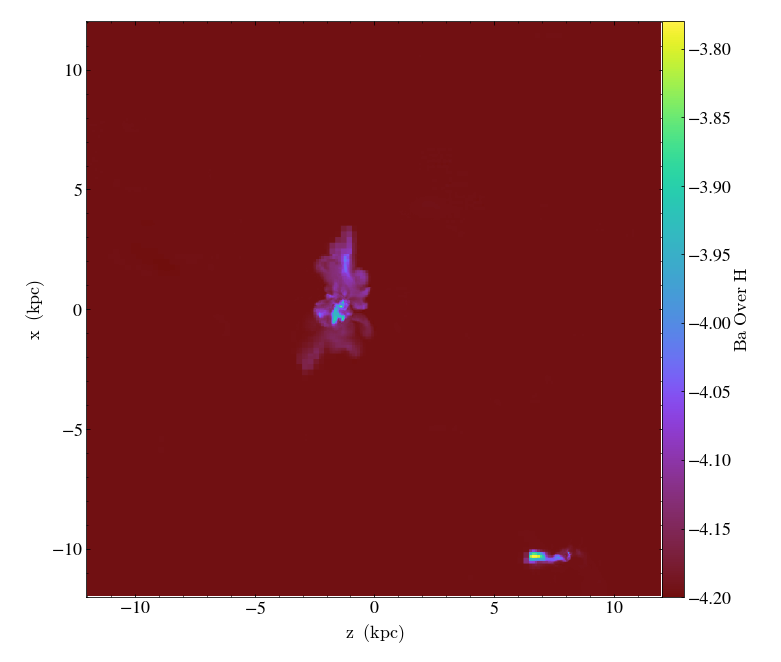

In [219]:
x = yt.ProjectionPlot(test2_ds, 'y', 'Ba_over_H',weight_field="Metal_Density",
                      data_source=test2_region, width = width2)
x.set_zlim('Ba_over_H',-4.2,-3.78)

x.show()

In [199]:
scale_factor

0.831381508702038

In [227]:
(ds.time_unit * 0.4423105).to('Myr')

9.500511107053736 Myr

In [228]:
(5.0 * yt.units.Myr).to('s').value / ds.time_unit.to('s').value

0.23278247612994357